In [762]:
import pandas as pd
import numpy as np

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold

from numpy import mean
from numpy import std
from numpy import absolute

import matplotlib as mpl
import matplotlib.pyplot as plt
from IPython.display import Image, display

mpl.rcParams['figure.figsize'] = (45,19)
mpl.rcParams['axes.grid'] = False


plt.style.use('seaborn')

In [763]:
df = pd.read_csv('https://raw.githubusercontent.com/Mohammad-Kaosain-Akbar/NILM-two-years-dataset/main/Data_Greener_all.csv')
df['Time'] = pd.to_datetime(df['Time'], infer_datetime_format=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43824 entries, 0 to 43823
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Time               43824 non-null  datetime64[ns]
 1   Ventilation        43824 non-null  float64       
 2   Sokets plug        43824 non-null  float64       
 3   Lighting           43824 non-null  float64       
 4   Other electricity  43824 non-null  float64       
 5   Cooling            43824 non-null  float64       
 6   Heating            43824 non-null  float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 2.3 MB


In [764]:
Total = df["Ventilation"] + df["Sokets plug"] + df["Lighting"] + df["Other electricity"] + df["Cooling"] + df["Heating"]
# https://www.kite.com/python/answers/how-to-sum-two-columns-in-a-pandas-dataframe-in-python

df["Total"] = Total

df

,Time,Ventilation,Sokets plug,Lighting,Other electricity,Cooling,Heating,Total
0,2017-01-03 13:00:00,27.4,41.8,53.7,89.6,18.60,498.0,729.10
1,2017-01-03 14:00:00,21.6,37.5,50.9,64.6,61.90,500.0,736.50
2,2017-01-03 15:00:00,18.5,37.4,60.1,64.2,16.50,480.0,676.70
3,2017-01-03 16:00:00,29.7,38.0,52.6,43.2,19.80,390.0,573.30
4,2017-01-03 17:00:00,16.7,38.1,56.7,42.4,15.20,373.0,542.10
...,...,...,...,...,...,...,...,...
43819,2022-01-03 08:00:00,59.3,17.9,16.6,115.0,12.70,344.0,565.50
43820,2022-01-03 09:00:00,71.9,20.6,33.1,149.0,11.90,399.0,685.50
43821,2022-01-03 10:00:00,90.5,30.9,47.8,157.0,12.90,397.0,736.10
43822,2022-01-03 11:00:00,94.0,33.9,52.2,155.0,15.40,345.0,695.50


array([<AxesSubplot:xlabel='Time'>, <AxesSubplot:xlabel='Time'>,
       <AxesSubplot:xlabel='Time'>, <AxesSubplot:xlabel='Time'>,
       <AxesSubplot:xlabel='Time'>, <AxesSubplot:xlabel='Time'>,
       <AxesSubplot:xlabel='Time'>], dtype=object)

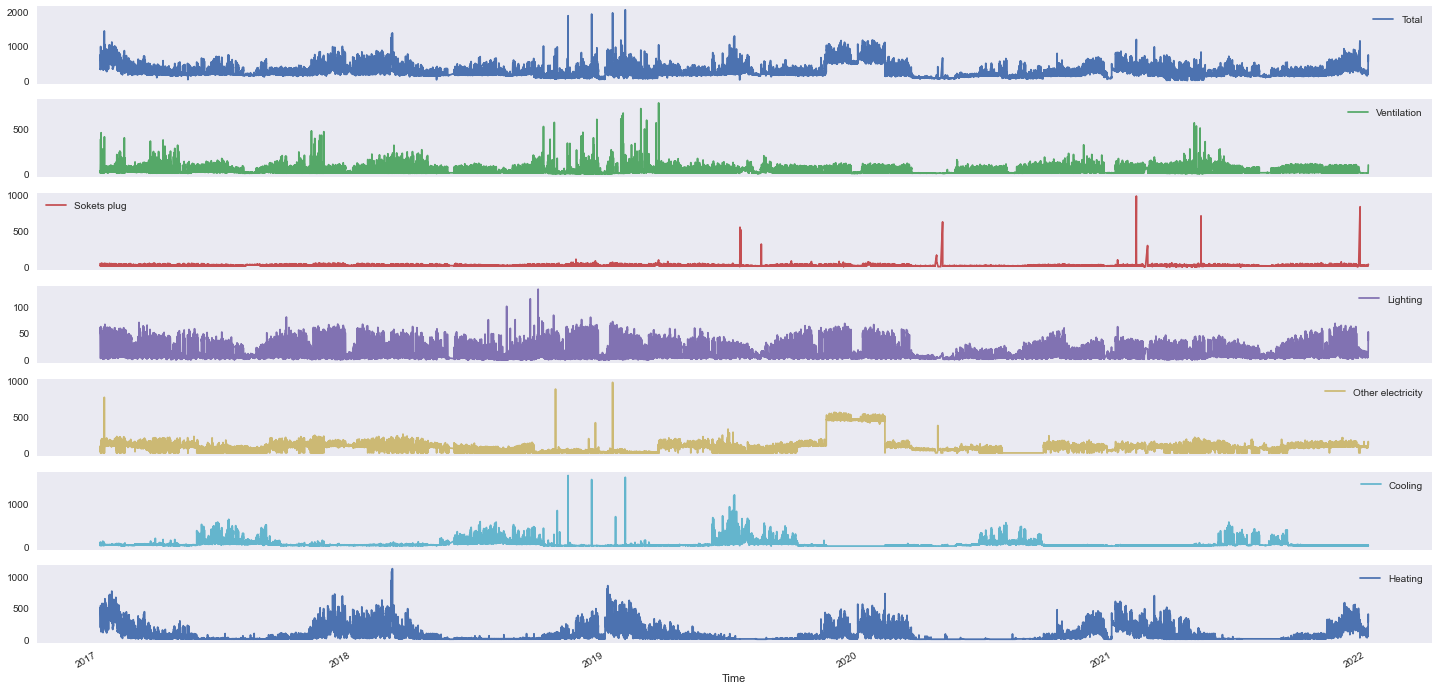

In [765]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from IPython.display import Image, display

mpl.rcParams['figure.figsize'] = (25,13)
mpl.rcParams['axes.grid'] = False

df.set_index('Time')[['Total','Ventilation',	'Sokets plug', 'Lighting',	'Other electricity',	'Cooling',	'Heating']].plot(subplots=True)

In [766]:
df['Day']=df['Time'].dt.day
df['Month']=df['Time'].dt.month
df['Week']=df['Time'].dt.week # week of the year
df['Year']=df['Time'].dt.year
df['Hour']=df['Time'].dt.hour

df['Day of week']=df['Time'].dt.dayofweek
df['Day of year']=df['Time'].dt.dayofyear
df['Quarter']=df['Time'].dt.quarter 

df


/var/folders/z0/00nhgx7d2k97w_b2j6mn3qbc0000gn/T/ipykernel_1305/2527219698.py:3: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  df['Week']=df['Time'].dt.week # week of the year


,Time,Ventilation,Sokets plug,Lighting,Other electricity,Cooling,Heating,Total,Day,Month,Week,Year,Hour,Day of week,Day of year,Quarter
0,2017-01-03 13:00:00,27.4,41.8,53.7,89.6,18.60,498.0,729.10,3,1,1,2017,13,1,3,1
1,2017-01-03 14:00:00,21.6,37.5,50.9,64.6,61.90,500.0,736.50,3,1,1,2017,14,1,3,1
2,2017-01-03 15:00:00,18.5,37.4,60.1,64.2,16.50,480.0,676.70,3,1,1,2017,15,1,3,1
3,2017-01-03 16:00:00,29.7,38.0,52.6,43.2,19.80,390.0,573.30,3,1,1,2017,16,1,3,1
4,2017-01-03 17:00:00,16.7,38.1,56.7,42.4,15.20,373.0,542.10,3,1,1,2017,17,1,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43819,2022-01-03 08:00:00,59.3,17.9,16.6,115.0,12.70,344.0,565.50,3,1,1,2022,8,0,3,1
43820,2022-01-03 09:00:00,71.9,20.6,33.1,149.0,11.90,399.0,685.50,3,1,1,2022,9,0,3,1
43821,2022-01-03 10:00:00,90.5,30.9,47.8,157.0,12.90,397.0,736.10,3,1,1,2022,10,0,3,1
43822,2022-01-03 11:00:00,94.0,33.9,52.2,155.0,15.40,345.0,695.50,3,1,1,2022,11,0,3,1


In [767]:
train = df.loc[(df['Year'].isin([2017,2018]))]
test = df.loc[(df['Year'].isin([2019]))]

In [768]:
from sklearn.multioutput import MultiOutputRegressor
from sklearn.neighbors import KNeighborsRegressor


def model (X_train, Y_train, X_test, name):
    model = MultiOutputRegressor(KNeighborsRegressor())
    model.fit(X_train, Y_train)
    
    # performing 10 fold cross validation of the model
    
    cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X_train, Y_train, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)

    scores = absolute(scores)
    print('Afer 10 fold cross validation, Mean MAE of the appliance '+name+' is : %.3f \n\n' % (mean(scores)))
    
    pred = model.predict(X_test)
    return pred

In [769]:
def generate_graph(b,pred,test):
    predict = pred
    predict = np.asarray(predict).reshape(-1)

    tests = test
    tests = np.asarray(tests).reshape(-1)
    
    
    mpl.rcParams['figure.figsize'] = (25,15)
    plt.axis([0, 800, -10, 600])
    
    plt.plot(predict, label='Predicted Value') #plot the loss
    plt.plot(tests, label='True Value', linestyle='--') #plot the validation loss
    plt.legend(['Predicted Value', 'True Value'], loc='upper right', fontsize=16)
    plt.title('Graph for '+b+' Prediction', fontsize=16)
    plt.xlabel('Number of samples', fontsize=16)
    plt.ylabel('Consumption Values of the appliance', fontsize=16)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
   
    
    MAE = np.mean(np.abs(predict-tests))
    print("MAE of "+b+" is: ",MAE)
    print("\n\n")
    print("\n** The graph shows test versus predict of 800 samples from the total samples of the "+b+" appliance **\n")


In [770]:
def model_training (feature, name):
    
    print("##################################### Model for "+name+" ##########################################\n\n")
    
    X_train = train.iloc[:, [12,8,9,11,7,10,13,14,15]]
    Y_train = train.iloc[:, [feature]]

    X_test = test.iloc[:, [12,8,9,11,7,10,13,14,15]]
    Y_test = test.iloc[:, [feature]]
    
    model_training.Xtrain_shape = X_train.shape
    model_training.Ytrain_shape = Y_train.shape
    model_training.Xtest_shape = X_test.shape
    model_training.Ytest_shape = Y_test.shape
    
    pred = model(X_train, Y_train, X_test, name)
    Y_test = Y_test.to_numpy()
    
    generate_graph(name, pred, Y_test)

##################################### Model for Ventilation ##########################################


Afer 10 fold cross validation, Mean MAE of the appliance Ventilation is : 13.602 


MAE of Ventilation is:  18.33998515981735




** The graph shows test versus predict of 800 samples from the total samples of the Ventilation appliance **



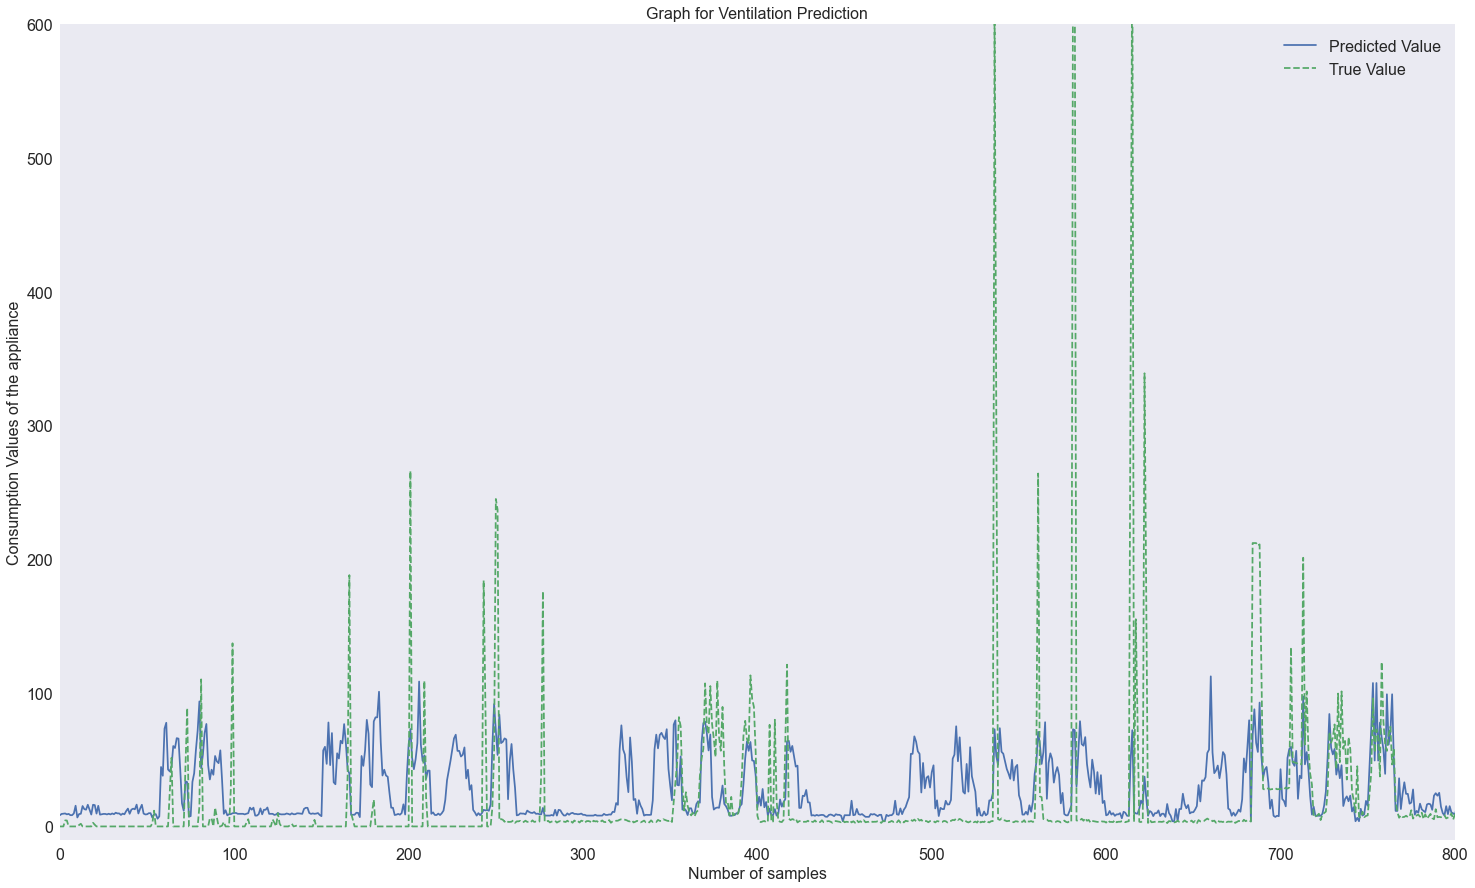

In [771]:
model_training(1,"Ventilation")

##################################### Model for Sokets plug ##########################################


Afer 10 fold cross validation, Mean MAE of the appliance Sokets plug is : 3.429 


MAE of Sokets plug is:  6.082222945205481




** The graph shows test versus predict of 800 samples from the total samples of the Sokets plug appliance **



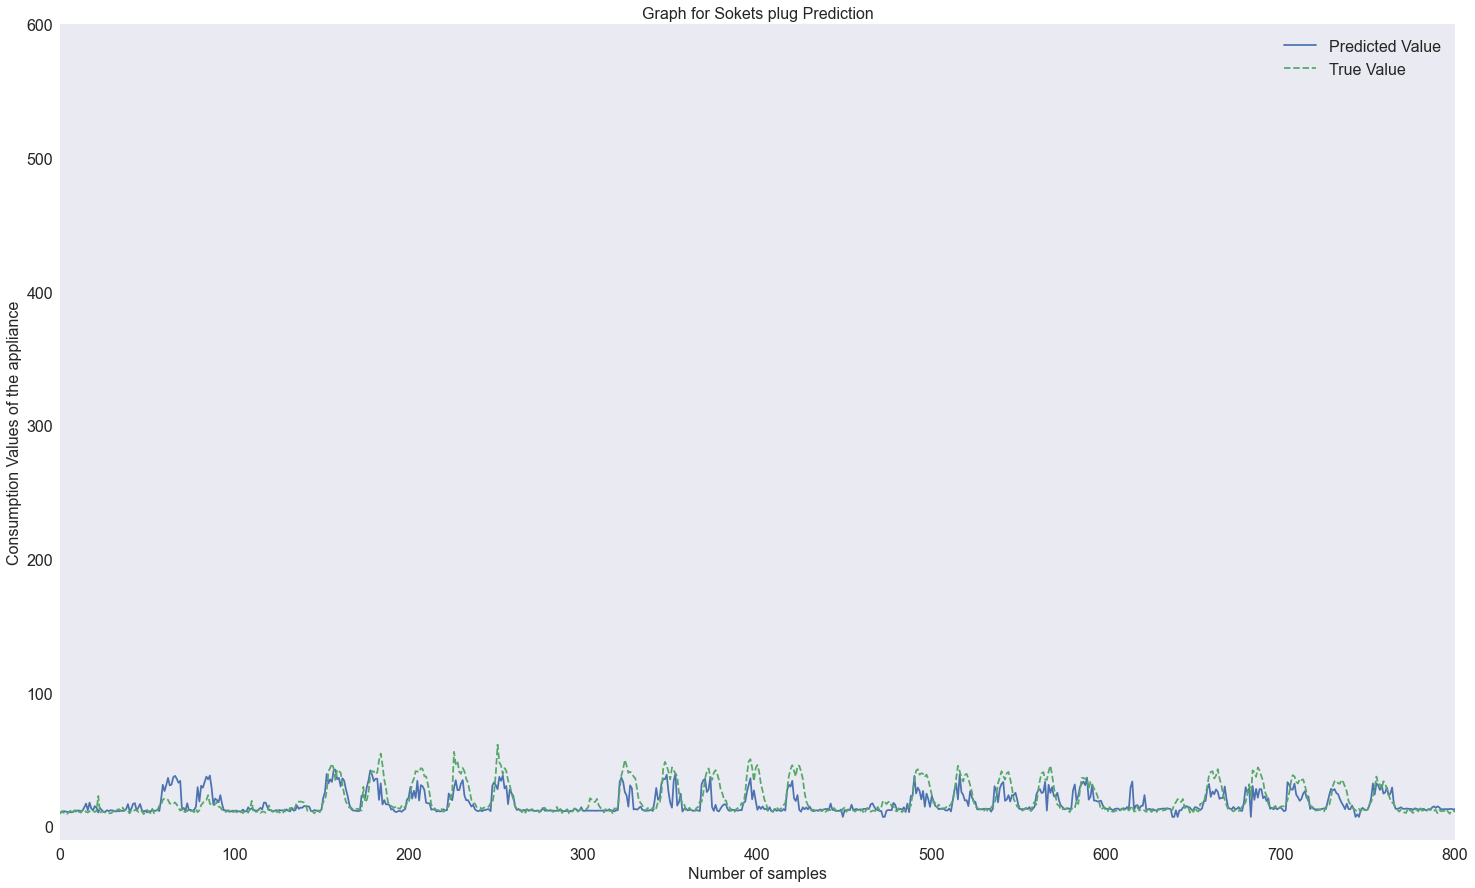

In [772]:
model_training(2,"Sokets plug")

##################################### Model for Lighting ##########################################


Afer 10 fold cross validation, Mean MAE of the appliance Lighting is : 5.102 


MAE of Lighting is:  8.416125547945205




** The graph shows test versus predict of 800 samples from the total samples of the Lighting appliance **



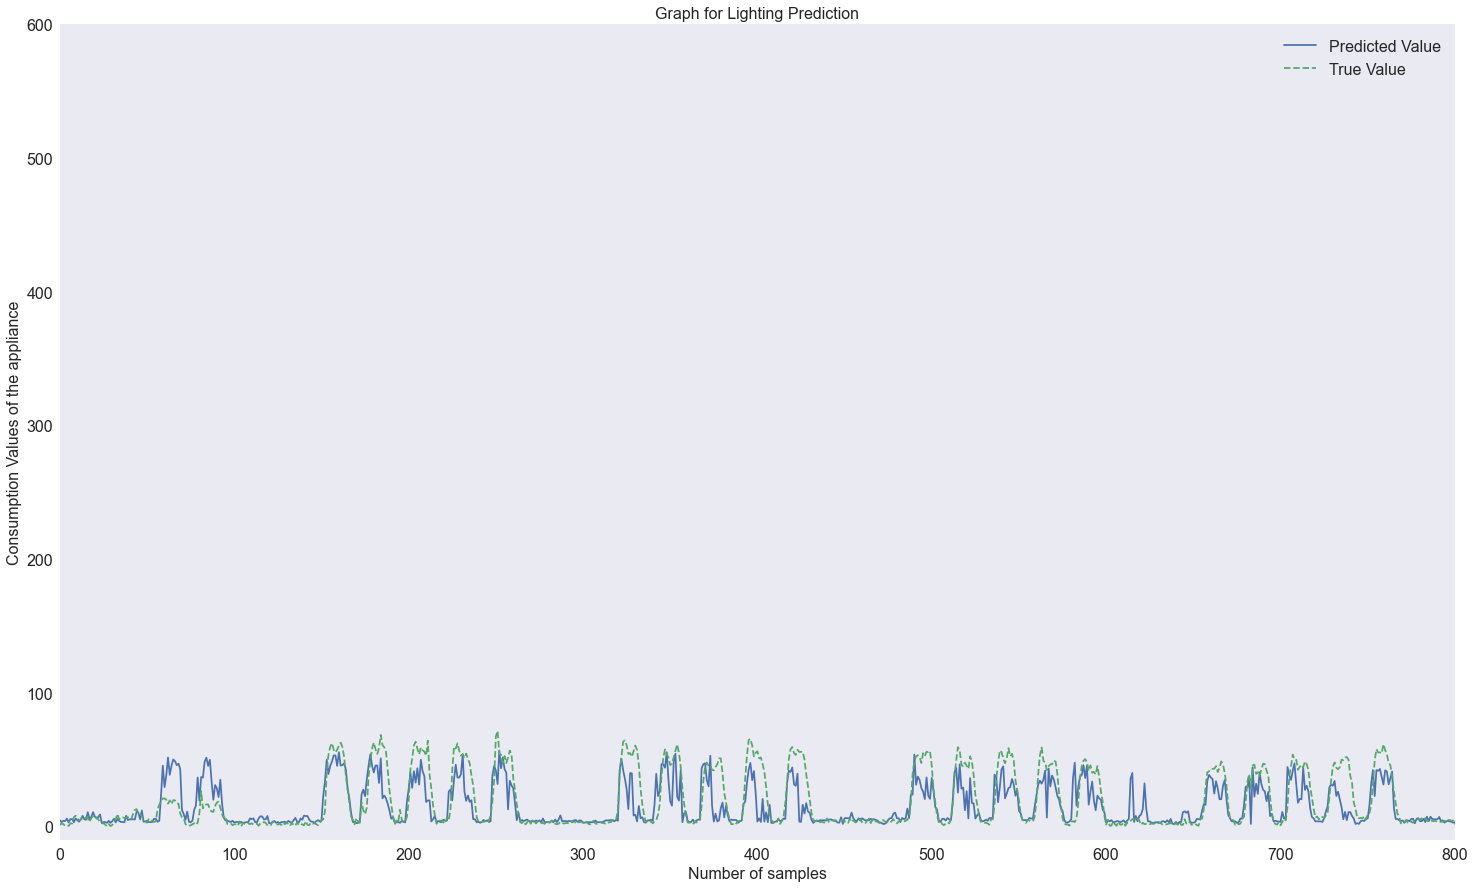

In [773]:
model_training(3,"Lighting")

##################################### Model for Other Electricity ##########################################


Afer 10 fold cross validation, Mean MAE of the appliance Other Electricity is : 20.242 


MAE of Other Electricity is:  82.02696957762558




** The graph shows test versus predict of 800 samples from the total samples of the Other Electricity appliance **



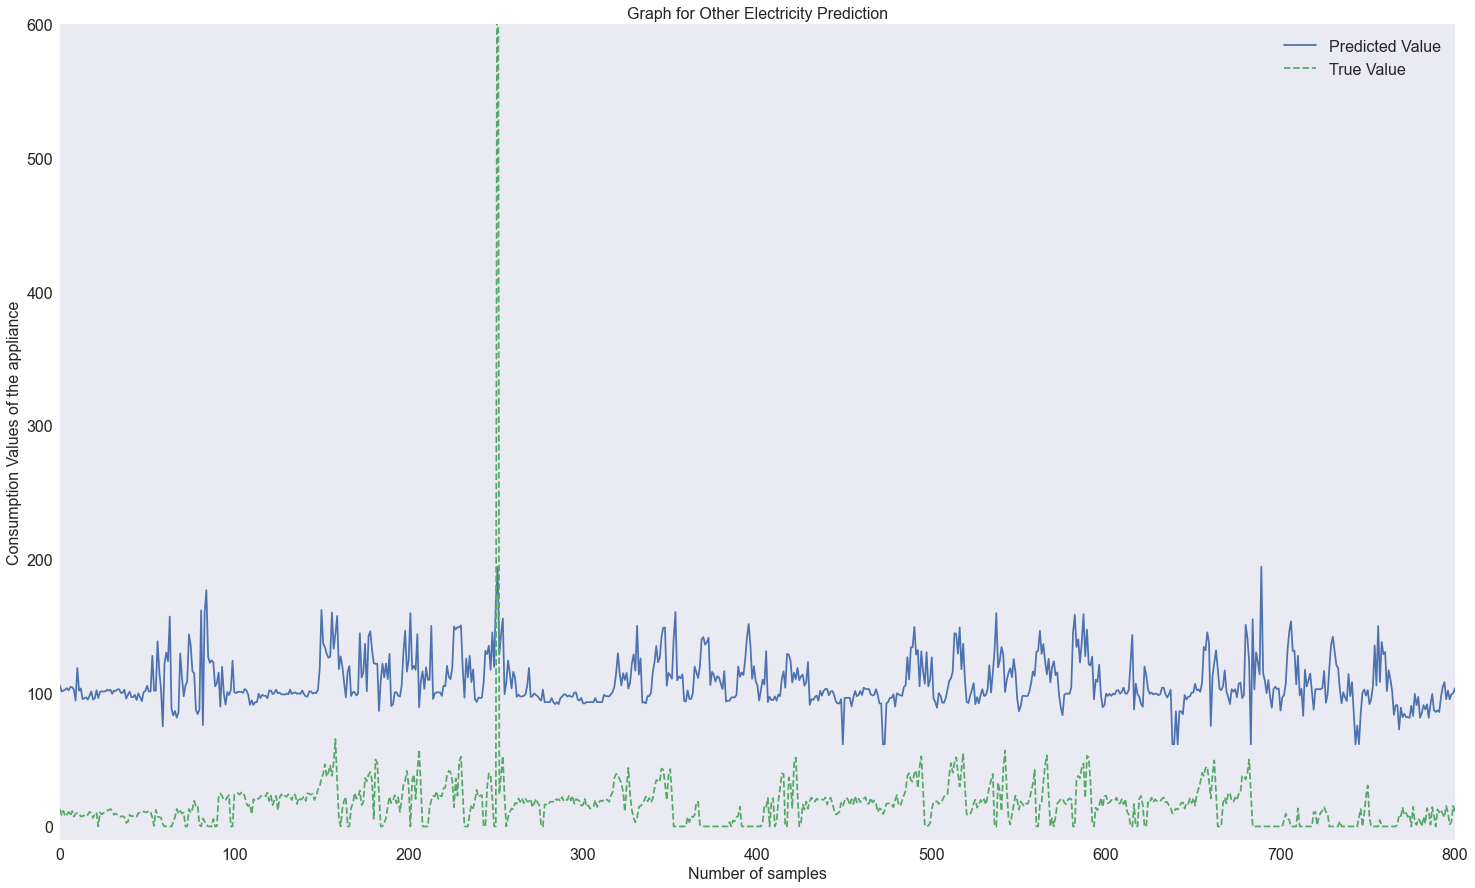

In [774]:
model_training(4,"Other Electricity")

##################################### Model for Cooling ##########################################


Afer 10 fold cross validation, Mean MAE of the appliance Cooling is : 12.086 


MAE of Cooling is:  22.91801392694064




** The graph shows test versus predict of 800 samples from the total samples of the Cooling appliance **



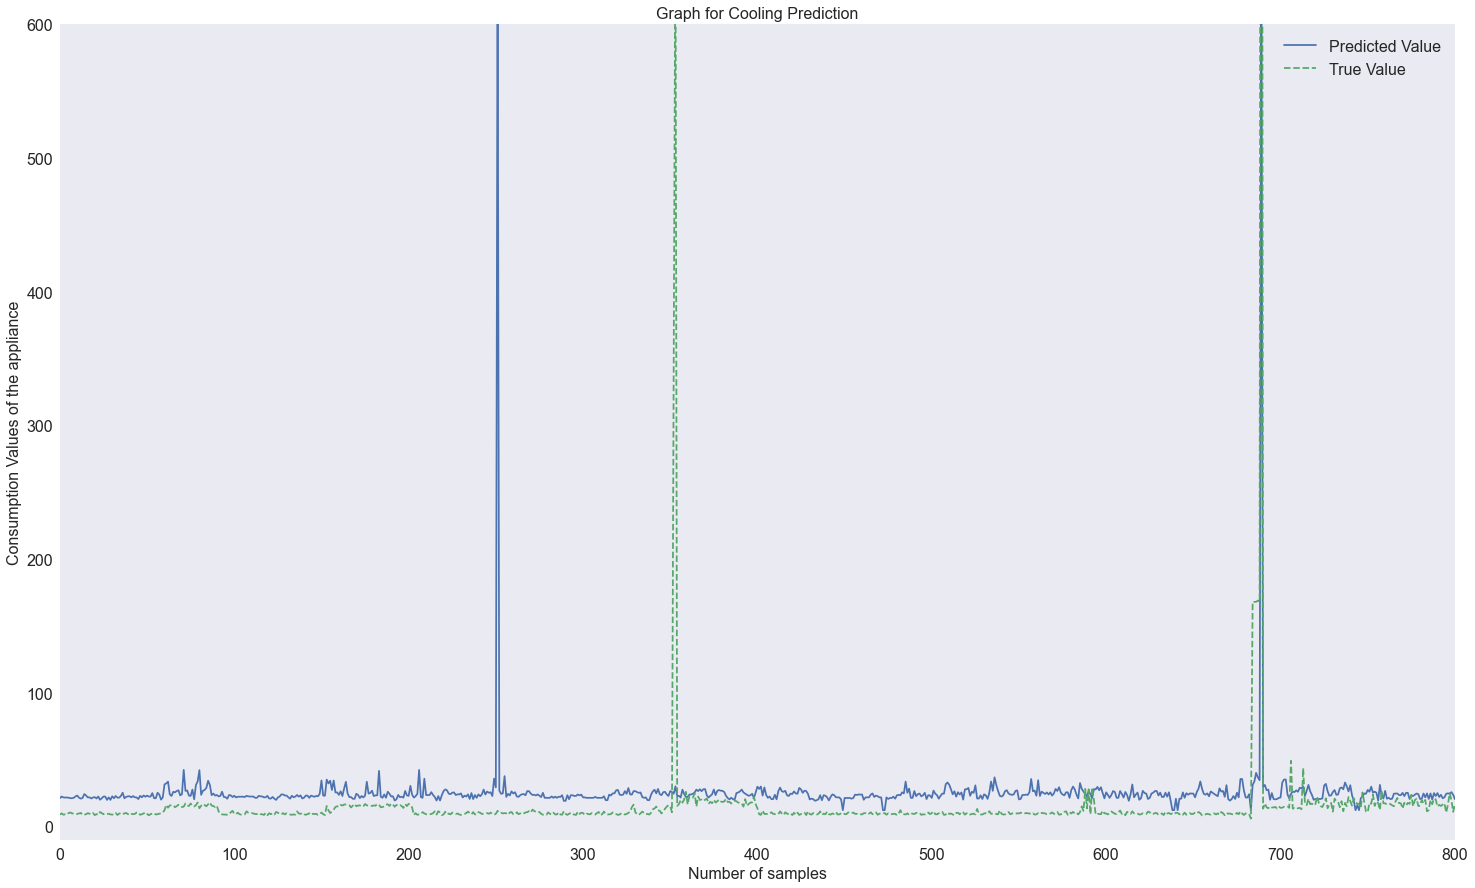

In [775]:
model_training(5,"Cooling")

##################################### Model for Heating ##########################################


Afer 10 fold cross validation, Mean MAE of the appliance Heating is : 12.816 


MAE of Heating is:  57.51067623287671




** The graph shows test versus predict of 800 samples from the total samples of the Heating appliance **



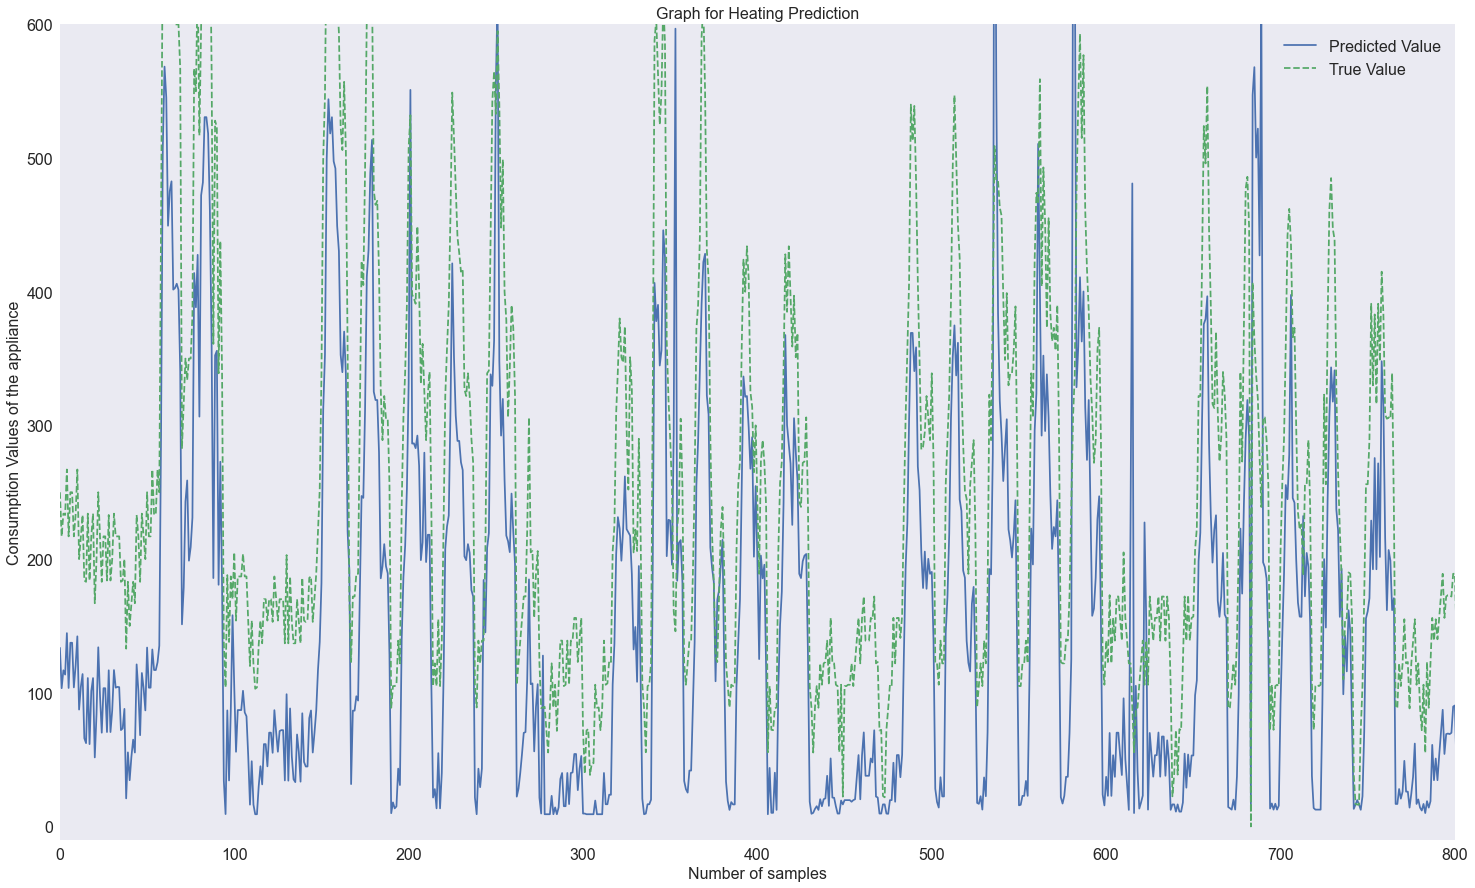

In [776]:
model_training(6,"Heating")

###  Figuring out the shapes of the train and test data

In [777]:
print("This was the shape X_train: \n\n ",model_training.Xtrain_shape)
print("\n\nThis was the shape Y_train: \n\n ",model_training.Ytrain_shape)
print("\n\nThis was the shape X_test: \n\n ",model_training.Xtest_shape)
print("\n\nThis was the shape Y_test: \n\n ",model_training.Xtest_shape)

This was the shape X_train: 

  (17459, 9)


This was the shape Y_train: 

  (17459, 1)


This was the shape X_test: 

  (8760, 9)


This was the shape Y_test: 

  (8760, 9)
